***
# Exploratory Data Analysis

- Author: Flávia Santos
- Date: 2018/09
- Supported Data Sources: CSV files 
- Output: 
            i.	Data quality report/summary report
            ii.	Architecture Diagram of pipeline

Data exploration offers an early view into the data. A number of data issues can be uncovered during this step and corresponding methods can be applied to address those issues. 

It is important to ask questions such as what is the source of the issue and how the issue may have been introduced. 

This also helps you decide on the data processing steps that need to be taken to resolve them. The kind of insights one intends to derive from the data can also be used to prioritize the data processing effort.

This tool provides various functionalities to help users explore the data and get insights through interactive visualization and statistical testing. 

### Import necessary packages and set up environment parameters

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=1000
%matplotlib inline

## <a name="read and summarize"></a> Read and Summarize the Data

### Check number of records and attributes (or features)

In [2]:
%%time
PATH = '../input'
train = pd.read_csv(PATH+"/process/train_flat.csv", dtype={'fullVisitorId':str})#,parse_dates=['date'], date_parser=dateparse)
test = pd.read_csv(PATH+"/process/test_flat.csv", dtype={'fullVisitorId':str})#,parse_dates=['date'], date_parser=dateparse)
sample_submission = pd.read_csv("../input/google-analytics-customer-revenue-prediction/sample_submission.csv")

CPU times: user 20.2 s, sys: 1.63 s, total: 21.8 s
Wall time: 22 s


In [3]:
%%time
print("Dimensions of the data (rows, cloumns):\n")
print('Size of train data', train.shape)
print('Size of test data', test.shape)
print('Size of sample_submission data', sample_submission.shape)
#export to report

Dimensions of the data (rows, cloumns):

Size of train data (903653, 55)
Size of test data (804684, 53)
Size of sample_submission data (617242, 2)
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.56 ms


In [4]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1.0,1,1.0,1.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo d

### The attribute data types

In [5]:
print("The data types in columns and missing data are:")
train.info()

The data types in columns and missing data are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
channelGrouping                                      903653 non-null object
date                                                 903653 non-null int64
fullVisitorId                                        903653 non-null object
sessionId                                            903653 non-null object
socialEngagementType                                 903653 non-null object
visitId                                              903653 non-null int64
visitNumber                                          903653 non-null int64
visitStartTime                                       903653 non-null int64
device.browser                                       903653 non-null object
device.browserSize                                   903653 non-null object
device.browserVersion                                903653 non-null object
device.de

### <a name="individual variable"></a>Extract Descriptive Statistics of Each Column

In [6]:
print("Descriptive statistics of numerical columns:\n")
train.describe()

Descriptive statistics of numerical columns:



,date,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adwordsClickInfo.page
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05,450630.0,903653.000000,703060.0,903553.000000,1.151500e+04,903653.0,21460.000000
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09,1.0,4.596538,1.0,3.849764,1.337448e+08,1.0,1.008108
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06,0.0,9.641437,0.0,7.025274,4.482852e+08,0.0,0.173584
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09,1.0,1.000000,1.0,1.000000,1.000000e+04,1.0,1.000000
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09,1.0,1.000000,1.0,1.000000,2.493000e+07,1.0,1.000000
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09,1.0,2.000000,1.0,1.000000,4.945000e+07,1.0,1.000000
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09,1.0,4.000000,1.0,4.000000,1.076550e+08,1.0,1.000000
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09,1.0,500.000000,1.0,469.000000,2.312950e+10,1.0,14.000000


In [7]:
print("Descriptive statistics of categorical columns")


Descriptive statistics of categorical columns


In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
print("Missing data:\n")
missing_data(train)

Missing data:



,Total,Percent
trafficSource.campaignCode,903652,99.999889
trafficSource.adContent,892707,98.788694
totals.transactionRevenue,892138,98.725728
trafficSource.adwordsClickInfo.page,882193,97.625195
trafficSource.adwordsClickInfo.adNetworkType,882193,97.625195
trafficSource.adwordsClickInfo.slot,882193,97.625195
trafficSource.adwordsClickInfo.isVideoAd,882193,97.625195
trafficSource.adwordsClickInfo.gclId,882092,97.614018
trafficSource.isTrueDirect,629648,69.678073
trafficSource.referralPath,572712,63.377425


## <a name="individual variables"></a>Explore Individual Variables

In [10]:
train.nunique()

channelGrouping                                           8
date                                                    366
fullVisitorId                                        714167
sessionId                                            902755
socialEngagementType                                      1
visitId                                              886303
visitNumber                                             384
visitStartTime                                       887159
device.browser                                           54
device.browserSize                                        1
device.browserVersion                                     1
device.deviceCategory                                     3
device.flashVersion                                       1
device.isMobile                                           2
device.language                                           1
device.mobileDeviceBranding                               1
device.mobileDeviceInfo                 

<div><div class="alert alert-block alert-info">
> # Pre-processig:

>There are quite a few colums with constant values, we can just drop them from **our** feature list and save some memory
and time in our modeling process.

>col_drop = list(col for col in train.columns if train[col].nunique()==1)

### Explore the target variable

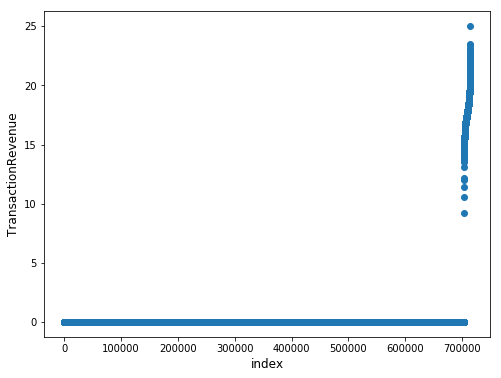

In [11]:
train["totals.transactionRevenue"] = train["totals.transactionRevenue"].astype('float')
temp = train.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(temp.shape[0]), np.sort(np.log1p(temp["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

>* The 80/20 rule has proven true for many businesses–only a small percentage of customers produce most of the revenue. As such, marketing teams are challenged to make appropriate investments in promotional strategies.

In this case, the ratio is even less:

In [12]:
notzero_tR = pd.notnull(train["totals.transactionRevenue"]).sum()
u_notzero_tR = (temp["totals.transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", notzero_tR, "| Ratio : ", notzero_tR / train.shape[0])
print("Number of unique customers with non-zero revenue : ", u_notzero_tR, "| Ratio: ", u_notzero_tR / temp.shape[0])

Number of instances in train set with non-zero revenue :  11515 | Ratio :  0.0127427231470487
Number of unique customers with non-zero revenue :  9996 | Ratio:  0.013996726255903731


In [13]:
print("Number of unique visitors in train set : ",train.fullVisitorId.nunique(), " out of ",train.shape[0], 'rows.')
#print("Number of unique visitors in train set : ",test_df.fullVisitorId.nunique(), " out of ",test_df.shape[0], 'rows.')
print("Number of common visitors in train and test set : ",len(set(train.fullVisitorId.unique()).intersection(set(test.fullVisitorId.unique())) ))

Number of unique visitors in train set :  714167  out of  903653 rows.
Number of common visitors in train and test set :  7679


### Explore individual numeric variables and test for normality (on sampled data)

#### Which browser produce the most 'transactionRevenue'?


In [14]:
# double check the value of 'count'
#temp = train[train['device.browser']=='Chrome']
#temp[temp['totals.transactionRevenue']>0].shape

In [15]:
print("size: # rows \ncount: # non-zeo revenue")
temp = train.groupby('device.browser')['totals.transactionRevenue'].agg(['size', 'count']) #add sort()
#temp = temp.sort_values(by="count", ascending=False)

size: # rows 
count: # non-zeo revenue


,size,count
device.browser,,
(not set),8,0
0,7,0
ADM,1,0
Amazon Silk,561,1
Android Browser,553,0
Android Runtime,2,0
Android Webview,7865,6
Apple-iPhone7C2,9,0
BlackBerry,184,0


#### Date Exploration:



<div><div class="alert alert-block alert-info">
# Pre-processig:

### Decoding date:
>train['date'] = train['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))

>test['date'] = test['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))

In [18]:
import datetime
# parsing date
train['date'] = train['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
test['date'] = test['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))

In [19]:
train.tail()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
903648,Social,2017-01-04,5123779100307500332,5123779100307500332_1483554750,Not Socially Engaged,1483554750,1,1483554750,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,Puerto Rico,not available in demo dataset,not available in demo dataset,not available in demo dataset,prtc.net,not available in demo dataset,not available in demo dataset,Caribbean,NaN,17,1.0,15.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/,youtube.com
903649,Social,2017-01-04,7231728964973959842,7231728964973959842_1483543798,Not Socially Engaged,1483543798,1,1483543798,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Asia,Sri Lanka,not available in demo dataset,not available in demo dataset,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,Southern Asia,NaN,18,1.0,13.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/,youtube.com
903650,Social,2017-01-04,5744576632396406899,5744576632396406899_1483526434,Not Socially Engaged,1483526434,1,1483526434,Android Webview,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,Seoul,not available in demo dataset,Asia,South Korea,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Seoul,Eastern Asia,NaN,24,1.0,21.0,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,NaN,referral,/yt/about/ko/,youtube.com
903651,Social,2017-01-04,2709355455991750775,2709355455991750775_1483592857,Not Socially Engaged,1483592857,1,1483592864,Chrome,not available in demo

In [20]:
temp = train.groupby('date')['totals.transactionRevenue'].agg(['size', 'count'])
temp.index[::-1] # show backwards --RangeIndex(start=89212, stop=-1, step=-1)

Index([2017-08-01, 2017-07-31, 2017-07-30, 2017-07-29, 2017-07-28, 2017-07-27,
       2017-07-26, 2017-07-25, 2017-07-24, 2017-07-23,
       ...
       2016-08-10, 2016-08-09, 2016-08-08, 2016-08-07, 2016-08-06, 2016-08-05,
       2016-08-04, 2016-08-03, 2016-08-02, 2016-08-01],
      dtype='object', name='date', length=366)

### Explore geographic variables:

In [23]:
# Continent
temp = train.groupby('geoNetwork.continent')['totals.transactionRevenue'].agg(['size', 'count'])
temp.columns = ["count", "count of non-zero revenue"]
temp = temp.sort_values(by="count", ascending=False)
trace1 = horizontal_bar_chart(temp["count"].head(10), 'rgba(58, 71, 80, 0.6)')
trace2 = horizontal_bar_chart(temp["count of non-zero revenue"].head(10), 'rgba(58, 71, 80, 0.6)')

In [24]:
temp

,count,count of non-zero revenue
geoNetwork.continent,,
Americas,450377,11283
Asia,223698,125
Europe,198311,79
Oceania,15054,14
Africa,14745,8
(not set),1468,6
